# Introduction to Clustering

In this notebook, we look at the unsupervised machine learning technique called clustering. We use this technique when we want to learn how data is arranged, or divide it into classes or categories, but we don't have class labels.

In the following example, we use clustering to try and separate the pixels of different colors in an image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import scipy.ndimage as ndi
from sklearn.cluster import KMeans, MeanShift 
import os

np.random.seed(42)

(-0.5, 1199.5, 800.5, -0.5)

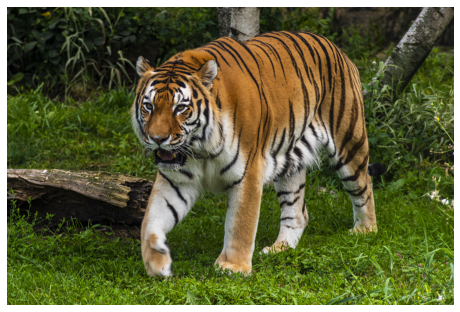

In [3]:
image = io.imread('../Data/tiger/tiger.jpg')
fig = plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')

In [4]:
pixels = np.zeros((image.shape[0]*image.shape[1],3))
count = 0
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        pixels[count] = image[row,col,:].flatten()
        count += 1
pixels

array([[  9.,  14.,   7.],
       [  8.,  14.,   4.],
       [ 15.,  21.,   9.],
       ...,
       [105., 138.,  59.],
       [104., 136.,  60.],
       [ 93., 125.,  49.]])

### K-Means Clustering ###

https://en.wikipedia.org/wiki/K-means_clustering

Next we apply K-means clustering on the data. Here, we choose K random cluster means. Then we re-create the clusters by assigning each point to its closest mean. Finally we re-calculate the means. We keep doing this until the means stop moving.

In [11]:
no_of_clusters = 5
model1 = KMeans(no_of_clusters)
model1.fit(pixels)
print(model1.cluster_centers_)

[[ 59.68316028  73.39827315  19.89288415]
 [193.01258672 186.03922861 169.16927641]
 [ 26.45668776  30.52244941  16.08877   ]
 [100.3382806  107.07142857  45.86261796]
 [157.73369959 134.17701709  80.94980413]]


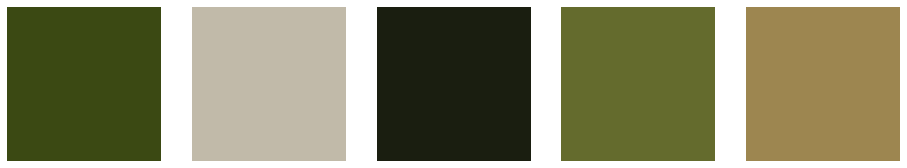

In [12]:
w = np.uint8(256/len(model1.cluster_centers_))
h = w
imgs= np.zeros([h,w,3,len(model1.cluster_centers_)],'uint8')
for i in range(len(model1.cluster_centers_)):
    for plane in range(3):
        imgs[:,:,plane,i] = np.uint8(model1.cluster_centers_[i,plane])


fig = plt.figure(figsize=(16, 8))

for i in range(len(model1.cluster_centers_)):
    ax = fig.add_subplot(1,len(model1.cluster_centers_),i+1)
    ax.imshow(imgs[:,:,:,i])
    ax.axis('off')

plt.show()

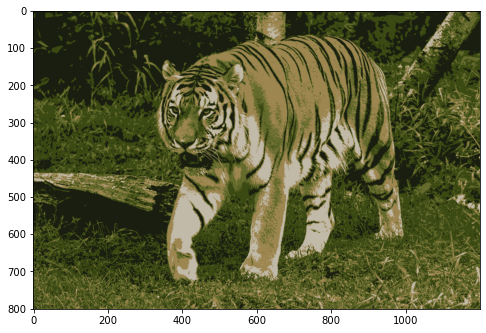

In [13]:
newImage = np.zeros(image.shape,'uint8')

count = 0
for row in range(newImage.shape[0]):
    for col in range(newImage.shape[1]):
        newImage[row,col,:] = np.uint8(model1.cluster_centers_[model1.labels_[count]])
        count += 1
fig = plt.figure(figsize=(8, 8))        
plt.imshow(newImage)

### Meanshift Clustering ###

https://en.wikipedia.org/wiki/Mean_shift

This is another clustering technique where we don't need to give the number of clusters. We give a bandwidth which determines the numbe rof clusters.

In [8]:
bw = 1
model2 = MeanShift(seeds=model1.cluster_centers_,bandwidth=bw,max_iter=100)
model2.fit(pixels)
print(model2.cluster_centers_)

[[ 21.          24.          15.        ]
 [ 64.53571429  88.          10.        ]
 [141.          97.          48.        ]
 [103.         134.          30.375     ]
 [178.         133.          68.        ]]


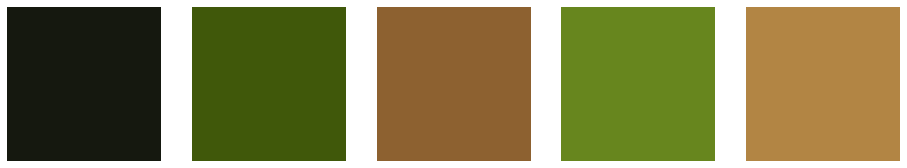

In [9]:
w = np.uint8(256/len(model1.cluster_centers_))
h = w
imgs= np.zeros([h,w,3,len(model1.cluster_centers_)],'uint8')
for i in range(len(model2.cluster_centers_)):
    for plane in range(3):
        imgs[:,:,plane,i] = np.uint8(model2.cluster_centers_[i,plane])


fig = plt.figure(figsize=(16, 8))

for i in range(len(model2.cluster_centers_)):
    ax = fig.add_subplot(1,len(model2.cluster_centers_),i+1)
    ax.imshow(imgs[:,:,:,i])
    ax.axis('off')

plt.show()

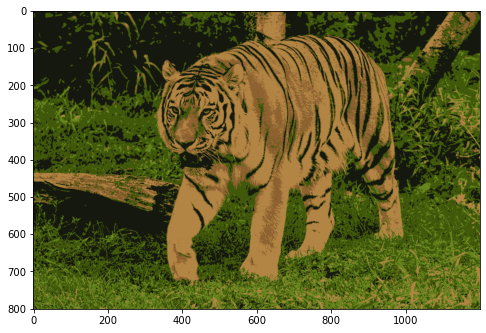

In [10]:
newImage = np.zeros(image.shape,'uint8')

count = 0
for row in range(newImage.shape[0]):
    for col in range(newImage.shape[1]):
        newImage[row,col,:] = np.uint8(model2.cluster_centers_[model2.labels_[count]])
        count += 1
fig = plt.figure(figsize=(8, 8))       
plt.imshow(newImage)